### Asignacion Final del Modulo 7

**Programa de MÁSTER EN DATA SCIENCE Y BUSINESS ANALYTICS**

**Módulo 7 - IA aplicad para Empresas**

**Estudiante:** Richard Douglas Grijalba

**Información relevante del ejercicio a desarrollar**

# Caso Práctico de Módulo 2: Clasificación de Tweets en Español (Análisis de Sentimientos)

* En el siguiente ejercicio tiene como objetivo aplicar los conocimientos vistos hasta el momento de:
    - Normalización de textos (procesamiento de textos)
    - Clasificación de textos
    
    
* El ejercicio consiste en clasificar una serie de tweets en Español que estan clasificados como '***positivos***', '***neutros***', '***negativos***' o '***None***' (desconocido), aunque solo vamos a trabajar con los tweets clasificados correctamente (los no desconocidos).


* Para este ejercicio se pide realizar todo el proceso de clasificación visto hasta el momento:
    1. Carga de los datos (ya implementado en el ejercicio)
    2. Normalización de los tweets
    3. Creacción de la Bolsa de Palabras de frecuencias
    4. Particionado de Datos
    5. Creacción de modelos
    6. Evaluación de los modelos



<hr>


## Carga de Datos


* El primer paso que vamos a realizar es el de cargar los datos. 


* Estos datos estan en un archivo con extensión '*txt*' pero tienen estructura de '*csv*' y tienen como separador '***::::***'.


* Este fichero lo podemos leer como un '*csv*' con pandas, estructurándolo de la siguiente manera:
    - **Posición 0**: Tweet
    - **Posición 1**: Sentimiento (Positivo | Neutro | Negativo)
    
    
* Los tweets estan clasificados con 4 etiquetas, pero vamos a trabajar solo con los tweets que sean '***positivos***', '***neutros***' o '***negativos***'.

In [1]:
import pandas as pd
tweets_file = 'C:/Users/Rdouglas/OneDrive/Documentos/tweets_castellano.txt'
df = pd.read_csv(tweets_file, sep="::::", names=['tweet','sentimiento'] ,engine='python')
df = df[df['sentimiento'].isin(['positivo', 'neutro', 'negativo'])]
tweets = [tuple(x) for x in df.values]
print('Número de Tweets Cargados: {num}'.format(num=len(tweets)))
df.head(5)

Número de Tweets Cargados: 5735


,tweet,sentimiento
1,@PauladeLasHeras No te libraras de ayudar me/n...,neutro
2,@marodriguezb Gracias MAR,positivo
3,"Off pensando en el regalito Sinde, la que se v...",negativo
4,Conozco a alguien q es adicto al drama! Ja ja ...,positivo
6,Toca @crackoviadeTV3 . Grabación dl especial N...,positivo


In [2]:
print("\nInformación del DataFrame:")
print(df.info())


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5735 entries, 1 to 7218
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet        5735 non-null   object
 1   sentimiento  5735 non-null   object
dtypes: object(2)
memory usage: 134.4+ KB
None


<hr>


## Normalización

* Para este ejercicio haremos uso de ***spaCy*** para la tokenización y normalización.


* Para ***normalizar*** los tweets realizaremos las siguientes acciones:
    1. Pasamos las frases a minúsculas.
    2. Eliminamos los signos de puntuación.
    3. Eliminamos las palabras con menos de 3 caracteres.
    4. Eliminamos las Stop-Words.
    5. Eliminamos los enlaces (vamos a dejar las menciones '@'.
    6. Pasamos la palabra a su lema


* Todos estos pasos los vamos a realizar en una misma función.



In [3]:
pip install spacy


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import spacy.cli

spacy.cli.download("es_core_news_sm")

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [6]:
import spacy
nlp = spacy.load('es_core_news_sm')

# Divido los datos en dos listas 
#     X: los tweets
#     y: target (polaridad)

X = [doc[0] for doc in tweets]
y = [doc[1] for doc in tweets]

def normalize(sentenses):
    """normalizamos la lista de frases y devolvemos la misma lista de frases normalizada"""
    for index, sentense in enumerate(sentenses):
        sentense = nlp(sentense.lower()) # Paso la frase a minúsculas y a un objeto de la clase Doc de Spacy
        sentenses[index] = " ".join([word.lemma_ for word in sentense if (not word.is_punct)
                                     and (len(word.text) > 2) and (not word.is_stop) 
                                     and (not word.text.startswith('http'))])
    return sentenses

# Normalizamos las frases
X = normalize(X)

Dentro de la función normalize(sentences), cada frase se procesa de la siguiente manera:
* Se convierte la frase a minúsculas.
* Se utiliza el modelo de SpaCy (nlp) para convertir la frase en un objeto de documento (Doc).
* Se itera sobre cada palabra en el documento y se realiza lo siguiente:
* Se verifica si la palabra no es un signo de puntuación, tiene más de 2 caracteres, no es una palabra detenida (stopword) y no comienza con 'http'.
* Si cumple con estas condiciones, se lematiza la palabra (se convierte a su forma base) y se agrega a una lista.
* las palabras lematizadas se unen para formar la frase normalizada.
* Se normalizan las frases en la lista X utilizando la función normalize(sentences)

<hr>


## Bolsa de Palabras de Frecuencias



In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1500, min_df=3)

# Pasamos los tweets normalizados a Bolsa de palabras
X = vectorizer.fit_transform(X)

<hr>


## Particionado de Datos (Train y Test)

* Particionar los datos en conjunto de Train y Test de la siguiente manera:
    - 80% de datos de entrenamiento
    - 20% de datos de test


In [8]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print('Número de Tweets para el entrenamiento: {num}'.format(num=X_train.shape[0]))
print('Número de Tweets para el test: {num}'.format(num=X_test.shape[0]))

Número de Tweets para el entrenamiento: 4588
Número de Tweets para el test: 1147


<hr>


## Creacción del Modelo

* Vamos a crear una serie de modelos con los siguientes Algoritmos de Aprendizaje de clasificación:

    - Multinomial Naive Bayes
    - Bernoulli Naive Bayes
    - Regresion Logistica
    - Support Vector Machine
    - Random Forest


In [9]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

mnb = MultinomialNB()
bnb = BernoulliNB()
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
svm_lin = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
rf = RandomForestClassifier(n_estimators=200, bootstrap=True, criterion='gini', max_depth=50, random_state=0)

clasificadores = {'Multinomial Naive Bayes': mnb,
                  'Bernoulli Naive Bayes': bnb,
                  'Regresion Logistica': lr,
                  'SVM lineal': svm_lin,
                  'SVM rbf': svm_rbf,
                  'Random Forest': rf}


# Ajustamos los modelos y calculamos el accuracy para los datos de entrenamiento
for k, v in clasificadores.items():
    print ('CREANDO MODELO: {clas}'.format(clas=k))
    v.fit(X_train, y_train)
    accuracy_train = v.score(X_train, y_train)
    print ('\tAccuracy Train: {acc_train}'.format(acc_train=accuracy_train)) 

CREANDO MODELO: Multinomial Naive Bayes
	Accuracy Train: 0.7650392327811683
CREANDO MODELO: Bernoulli Naive Bayes
	Accuracy Train: 0.7497820401046208
CREANDO MODELO: Regresion Logistica
	Accuracy Train: 0.826721883173496
CREANDO MODELO: SVM lineal
	Accuracy Train: 0.8435047951176984
CREANDO MODELO: SVM rbf
	Accuracy Train: 0.8694420226678291
CREANDO MODELO: Random Forest
	Accuracy Train: 0.775283347863993


<hr>


## Evaluación del Modelo

Se procede a la evaluacion de los modelos


* Para cada uno de los modelos vamos a calcular las siguientes métricas de evaluación:

    1. **Accuracy**
    2. **Precision**
    3. **Recall**
    4. **F1**



In [10]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

def evaluation(model, name, X_train, y_train, X_test, y_test):
    """
    Función de devuelve en un diccionario las métricas de evaluación de 
    Accuracy, Precision, Recall y F1 para los conjuntos de datos de entrenamiento y test
        model: modelo a evaluar
        name: nombre del modelo
        X_train: Variables de entrada del conjunto de datos de entrenamiento
        y_train: Variable de salida del conjunto de datos de entrenamiento
        X_test: Variables de entrada del conjunto de datos de test
        y_test: Variable de salida del conjunto de datos de test
        return: diccionario con el nombre del modelo y el valor de las métricas
    """
    model_dict = {}
    model_dict['name'] = name
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    model_dict['accuracy_train'] = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    model_dict['accuracy_tests'] = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    model_dict['precision_train'] = precision_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['precision_tests'] = precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    model_dict['recall_train'] = recall_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['recall_tests'] = recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    model_dict['f1_train'] = f1_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['f1_tests'] = f1_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    
    return model_dict


# Calculamos las métricas de los modelos por separado
evaluacion = list()
for key, model in clasificadores.items():
    evaluacion.append(evaluation(model=model, name=key, 
                                 X_train=X_train, y_train=y_train,
                                 X_test=X_test, y_test=y_test))

# Pasamos los resultados a un DataFrame para visualizarlos mejor
results = pd.DataFrame.from_dict(evaluacion)
results.set_index("name", inplace=True)
results

,accuracy_train,accuracy_tests,precision_train,precision_tests,recall_train,recall_tests,f1_train,f1_tests
name,,,,,,,,
Multinomial Naive Bayes,0.765039,0.682650,0.758975,0.662498,0.765039,0.682650,0.754221,0.668103
Bernoulli Naive Bayes,0.749782,0.672188,0.743572,0.642934,0.749782,0.672188,0.734797,0.649920
Regresion Logistica,0.826722,0.653880,0.829169,0.624580,0.826722,0.653880,0.816128,0.633921
SVM lineal,0.843505,0.639930,0.848145,0.615524,0.843505,0.639930,0.836658,0.624788
SVM rbf,0.869442,0.660854,0.882361,0.588556,0.869442,0.660854,0.855724,0.620896
Random Forest,0.775283,0.634699,0.833204,0.570539,0.775283,0.634699,0.753789,0.587266


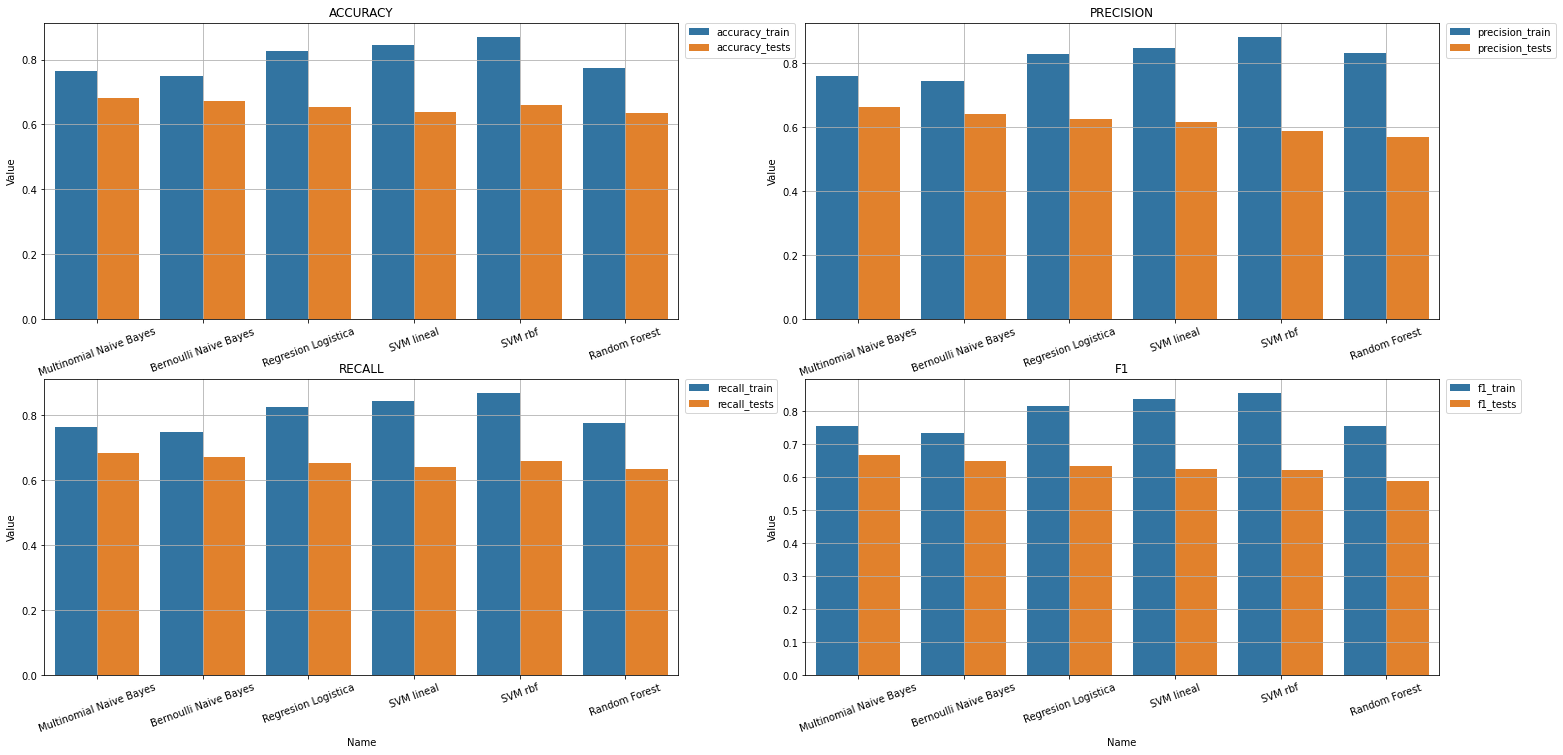

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Métricas a pintar
METRICS = ["accuracy", "precision", "recall", "f1"]

# Transformamos el dataframe para pintar las gráficas con seaborn
df_plot = results.reset_index().melt(id_vars='name').rename(columns=str.title)

plt.figure(figsize=(25, 12))
pos = 1
for metric in METRICS:
    # Filtramos la métrica a pintar
    df_aux = df_plot[df_plot['Variable'].str.contains(metric)]
    
    # Pintamos la gráfica en su posición 2x2
    plt.subplot(2, 2, pos)
    sns.barplot(x='Name', y='Value', hue='Variable', data=df_aux)
    plt.title(metric.upper())
    plt.grid()
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation=20)
    pos += 1
plt.show()

Obteniendo Matriz de Confusión de: Multinomial Naive Bayes
Obteniendo Matriz de Confusión de: Bernoulli Naive Bayes
Obteniendo Matriz de Confusión de: Regresion Logistica
Obteniendo Matriz de Confusión de: SVM lineal
Obteniendo Matriz de Confusión de: SVM rbf
Obteniendo Matriz de Confusión de: Random Forest


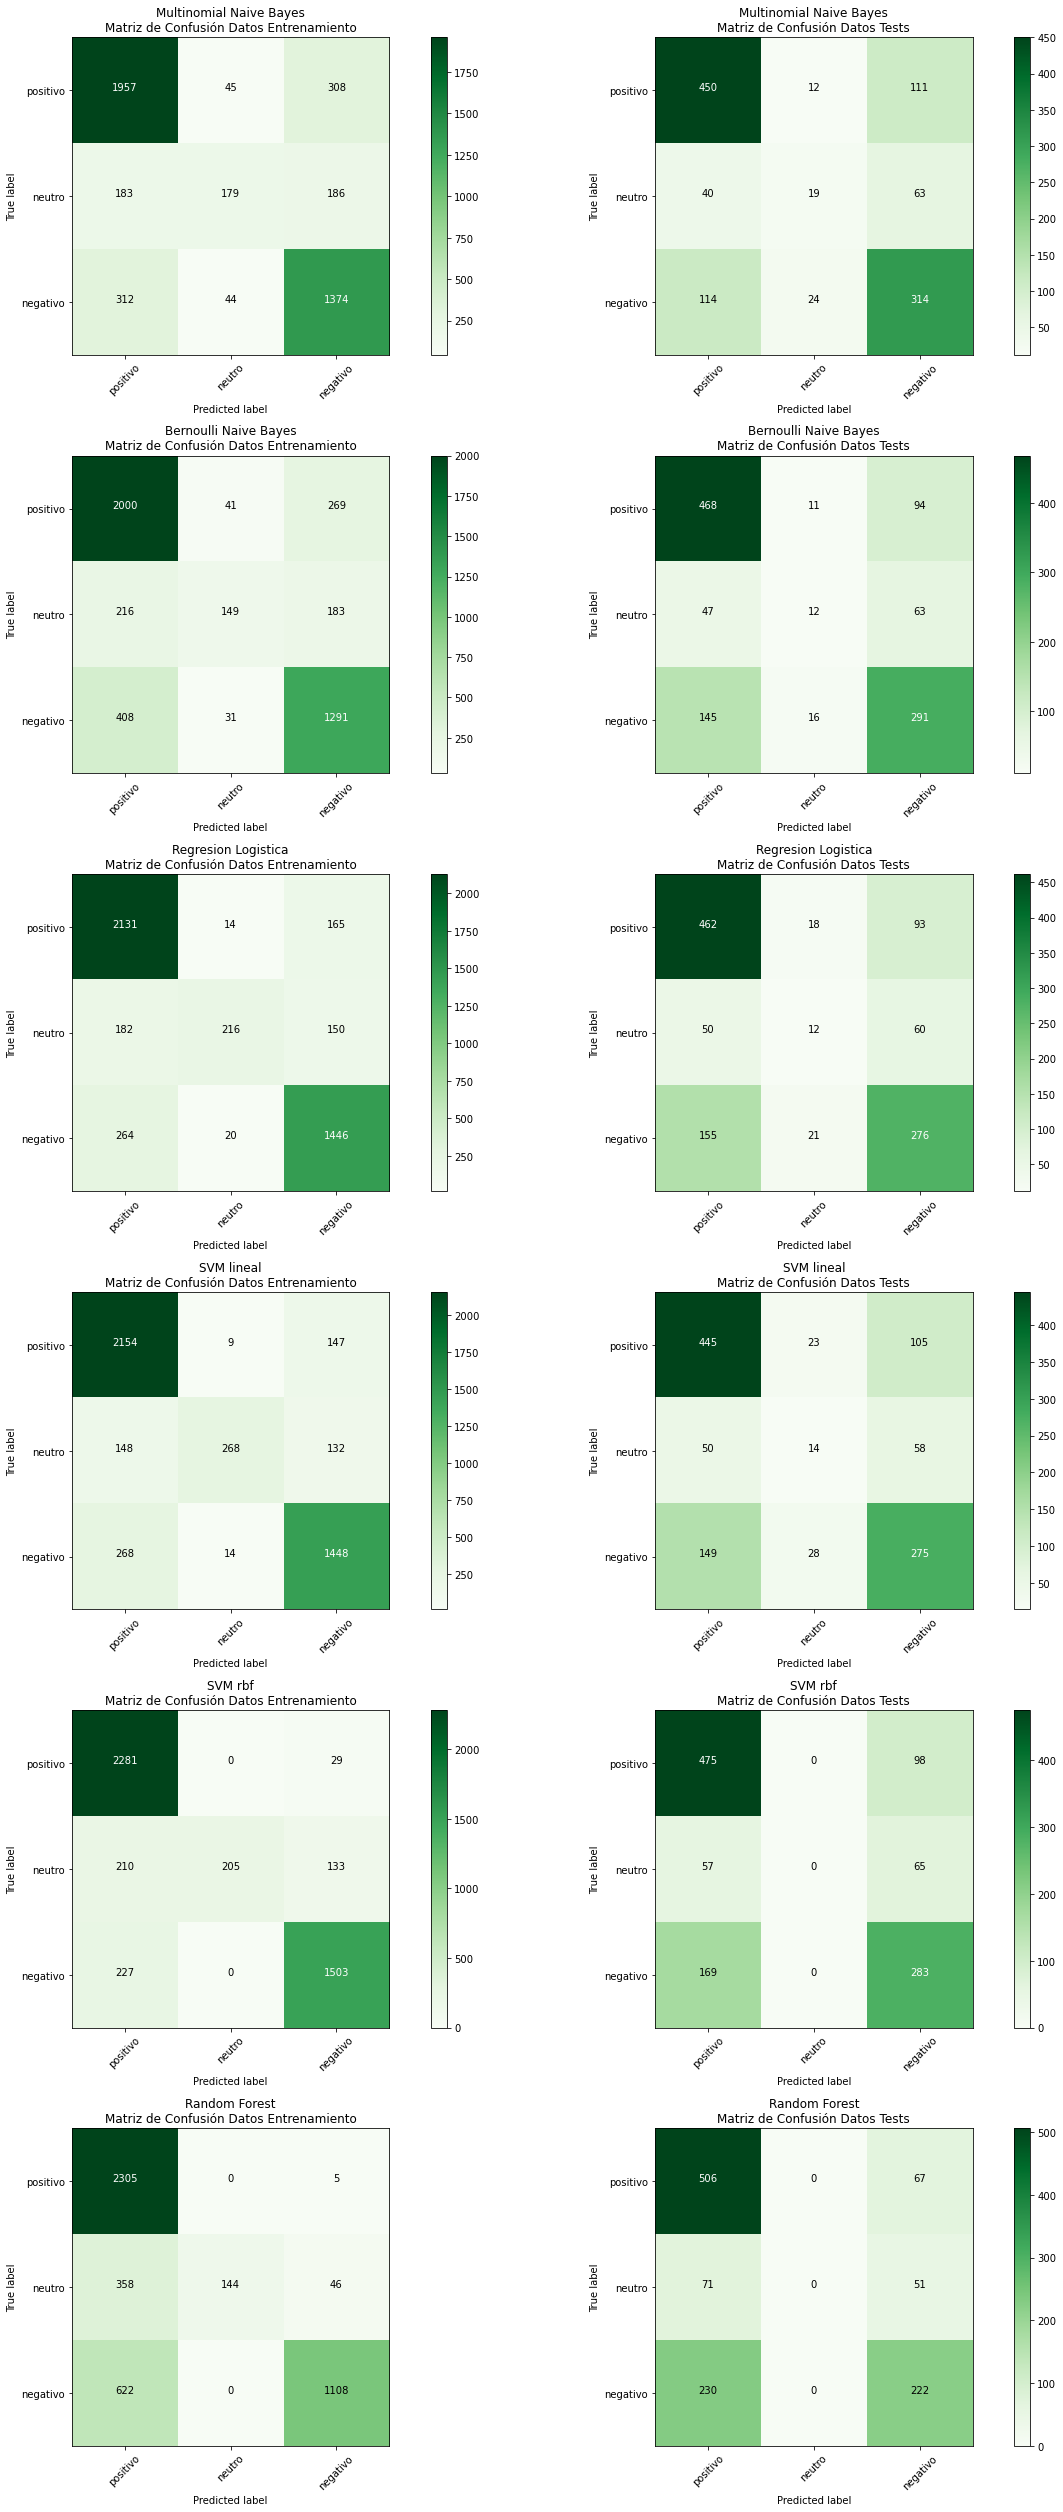

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

from sklearn.metrics import confusion_matrix

polaridad = ['positivo', 'neutro', 'negativo']

# Obtenemos las Matrices de confusión
msc = list()
for k, v in clasificadores.items():
    print ('Obteniendo Matriz de Confusión de: {model}'.format(model=k))
    model = {}
    model['name'] = k
    y_pred_train = v.predict(X_train)
    y_pred_test = v.predict(X_test)
    model['confusion_matrix_train'] = confusion_matrix(y_true=y_train, y_pred=y_pred_train, labels=polaridad)
    model['confusion_matrix_test'] = confusion_matrix(y_true=y_test, y_pred=y_pred_test, labels=polaridad)
    msc.append(model)

    
# Definimos el heatmap de la matriz de confusión
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Pintamos las matrices de confusión
plt.figure(figsize=(20, 35))
pos = 0
for mc in msc:
    pos += 1
    plt.subplot(6, 2, pos)
    plot_confusion_matrix(mc['confusion_matrix_train'], classes=polaridad, 
                          title='{}\nMatriz de Confusión Datos Entrenamiento'.format(mc['name']))
    pos += 1
    plt.subplot(6, 2, pos)
    plot_confusion_matrix(mc['confusion_matrix_test'], classes=polaridad, 
                          title='{}\nMatriz de Confusión Datos Tests'.format(mc['name'] ))
plt.show()